In [1]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:

!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > CNN_Dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3639M  100 3639M    0     0   105M      0  0:00:34  0:00:34 --:--:--  130M


In [3]:
import pytorch_lightning as pl
import pandas as pd
import os
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:

!unzip CNN_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [14]:
import statistics
from torch import nn
from torch.nn import functional as Funn
from torchvision import datasets, transforms

In [15]:
import pytorch_lightning as pl
import pandas as pd
import os
import torch
import torchvision
from torch.utils.data import Dataset ,DataLoader
from torchmetrics import Accuracy
from pytorch_lightning.callbacks import ModelCheckpoint
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as Fnn
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models
from pytorch_lightning.loggers import WandbLogger
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

In [16]:
!pip install wandb
import wandb

In [32]:
wandb.login(key="ed57c3903aa24b40dc30a68b77aad62d1489535b")
pName = "CS6910 - Assignment 2"
run_obj=wandb.init( project=pName)

# Set up the configuration for the sweep using the `wandb.sweep` function
sweep_config = {
    'method': 'bayes',
    'metric': {'name': 'val accuracy', 'goal': 'maximize'},
    'parameters': {
        'drop_OUT': {"values": [0.2, 0.3]},
        "activation_FUN": {
              "values": [ "ReLU", "SiLU", "GELU", "Mish"]
          },

          "learning_rate": {
              "values": [1e-3, 1e-4]
          }
          ,
        "filter_ORG":{
            #"values":["[4,8,16,32,64],[64,32,16,8,4],[32,32,32,32,32],[64,64,64,64,64]"]

        "values": [
                [4,8,16,32,64],[64,32,16,8,4],[32,32,32,32,32],[64,64,64,64,64]
            ]
          },
        "data_AUG":{
            "values":["Yes","No"]
        },
        "batch_NORM":{
            "values":["Yes","No"]
        },
          "epochs": {
              "values": [5, 10]
          },
    }
}

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


In [25]:
class CNN_Train(pl.LightningModule):

  def __init__(self,activation_FUN,batch_NORM,data_AUG,filter_ORG,drop_OUT):

    self.val_loss=[]
    self.train_loss=[]

    self.activation_FUN=activation_FUN
    self.batch_NORM=batch_NORM

    self.train_accuracy=[]
    self.val_accuracy=[]


    #syntax:The syntax is torch.nn.Conv2d(in_channels, out_channels, kernel_size)

    super(CNN_Train,self).__init__()

    self.convo_1 = torch.nn.Conv2d(3,filter_ORG[0],3)
    self.convo_2 = torch.nn.Conv2d(filter_ORG[0], filter_ORG[1], 3)
    self.convo_3 = torch.nn.Conv2d(filter_ORG[1], filter_ORG[2], 3)
    self.convo_4 = torch.nn.Conv2d(filter_ORG[2], filter_ORG[3], 3)
    self.convo_5 = torch.nn.Conv2d(filter_ORG[3], filter_ORG[4], 3)

    if(activation_FUN=="ReLU"):
              self.activation_FUN=nn.ReLU()
    elif(activation_FUN=="GELU"):
             self.activation_FUN=nn.GELU()
    elif(activation_FUN=="SiLU"):
              self.activation_FUN=nn.SiLU()
    elif(activation_FUN=="Mish"):
             self.activation_FUN=nn.Mish()
    else:
             print("ERROR")

    stride=2
    input_dimension=256

    DenseLayerDimension = input_dimension
    for filter in filter_ORG:
      DenseLayerDimension = (DenseLayerDimension-4)//stride + 1

    filter_size=64
    if(filter_ORG=="same"):
      filter_organisation1 = [filter_size]*5
    elif(filter_ORG=="half"):
      filter_organisation1=[filter_size,filter_size//2,filter_size//4,filter_size//8,filter_size//16]
    elif(filter_ORG=="double"):
      filter_organisation1=[filter_size,filter_size*2,filter_size*4,filter_size*8,filter_size*16]

    self.f_batch = nn.BatchNorm1d(DenseLayerDimension*DenseLayerDimension*filter_ORG[4])
    self.maxpool= nn.MaxPool2d(2)
    self.flatten= nn.Flatten()
    self.fc_Layer= nn.Linear(DenseLayerDimension*DenseLayerDimension*filter_ORG[4],10)
    #self.fc_Layer = nn.Linear(filter_ORG[4] * input_dimension * input_dimension, 10)
    self.softmax= nn.Softmax()
    self.learning_rate=0.001
    self.s_dropout= nn.Dropout(p=drop_OUT)
    self.save_hyperparameters()

  def forward(self,x):

    output = self.activation_FUN(self.convo_1(x))
    output = self.maxpool(output)

    output = self.activation_FUN(self.convo_2(output))  # Apply activation after the convolution
    output = self.maxpool(output)

    output = self.activation_FUN(self.convo_3(output))  # Apply activation after the convolution
    output = self.maxpool(output)

    output = self.activation_FUN(self.convo_4(output))  # Apply activation after the convolution
    output = self.maxpool(output)

    output = self.activation_FUN(self.convo_5(output))  # Apply activation after the convolution
    output = self.maxpool(output)

    output = self.flatten(output)

    if self.batch_NORM == "Yes":
        output = self.f_batch(output)

    output = self.s_dropout(output)

    output = self.activation_FUN(self.fc_Layer(output))  # Apply activation to the fully connected layer
    return output

  def training_step(self, batch, batch_index):
    x, y = batch
    un_logits = self(x)
    loss = Funn.cross_entropy(un_logits,y)
    self.train_loss.append(loss)
    accuracy = (un_logits.argmax(dim=1) == y).float().mean()
    self.train_accuracy.append(accuracy)

    return loss

  def validation_step(self, batch, batch_index):
    x, y = batch
    un_logits = self(x)
    loss = Funn.cross_entropy(un_logits,y)
    self.val_loss.append(loss)
    accuracy = (un_logits.argmax(dim=1) == y).float().mean()
    self.val_accuracy.append(accuracy)


  def test_step(self, batch, batch_index):
    x, y = batch
    un_logits = self(x)
    loss = Funn.cross_entropy(un_logits,y)
    self.log("test loss",loss, prog_bar=True)
    accuracy = (un_logits.argmax(dim=1) == y).float().mean()
    self.log("test accuracy",accuracy,prog_bar=True)

  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
    return optimizer

  def on_train_epoch_end(self):

    train_loss = torch.stack(self.train_loss).mean()
    self.train_loss=[]

    val_loss = torch.stack(self.val_loss).mean()
    self.val_loss=[]

    train_accuracy = torch.stack(self.train_accuracy).mean()
    self.train_accuracy=[]

    val_accuracy = torch.stack(self.val_accuracy).mean()
    self.val_accuracy=[]


    wandb.log({"train loss":train_loss,"train accuracy":train_accuracy,"val loss":val_loss,"val accuracy":val_accuracy})

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((256,256)),

    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

transform_augmented = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.AutoAugment(),

    transforms.ToTensor(),

    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])


# Load dataset from directory
train_dataset = datasets.ImageFolder('/content/inaturalist_12K/train', transform=transform)
test_dataset = datasets.ImageFolder('/content/inaturalist_12K/val', transform=transform)

# Split dataset into training and testing sets
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [int(0.8*len(train_dataset)), len(train_dataset)-int(0.8*len(train_dataset))])

# Create data loader objects for training and testing sets
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


obj = CNN_Train("Mish","Yes","No",[64,64,64,64,64], 0.2)
trainer = pl.Trainer(max_epochs=5)  #, accelerator="gpu", devices=1)
trainer.fit(model=obj,train_dataloaders=train_dataloader,val_dataloaders=val_dataloader)
trainer.test(obj,  test_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 1.8 K 
1  | convo_2        | Conv2d      | 36.9 K
2  | convo_3        | Conv2d      | 36.9 K
3  | convo_4        | Conv2d      | 36.9 K
4  | convo_5        | Conv2d      | 36.9 K
5  | activation_FUN | Mish        | 0     
6  | f_batch        | BatchNorm1d | 4.6 K 
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 23.1 K
10 | softmax        | S

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test accuracy       │    0.31049999594688416    │
│         test loss         │    2.0222742557525635     │
└───────────────────────────┴───────────────────────────┘

[{'test loss': 2.0222742557525635, 'test accuracy': 0.31049999594688416}]

**GRID OF IMAGES**

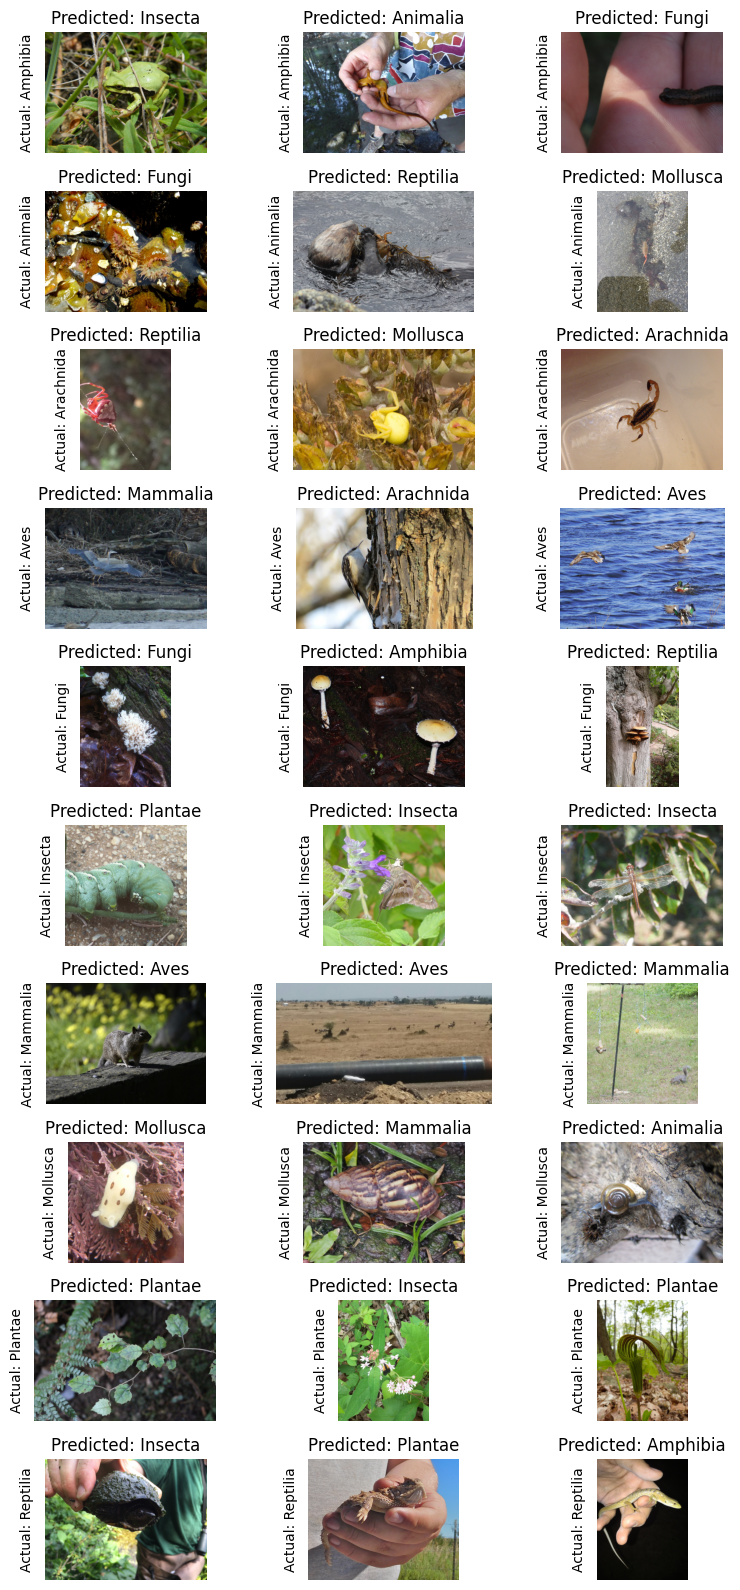

In [21]:
labels=["Amphibia", "Animalia", "Arachnida", "Aves", "Fungi", "Insecta", "Mammalia", "Mollusca", "Plantae", "Reptilia"]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(8, 16))
j = -1
for i, ax in enumerate(axes.flat):
    if (i%3 == 0):
      j= j+1

    folder_path = "/content/inaturalist_12K/train/"+labels[j]
    file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    random_file = random.choice(file_list)

    image = Image.open(folder_path+'/'+random_file)
    image_t= transform(image)
    obj.eval()
    image_t = image_t.reshape(1,3,256,256)
    predictions = obj.forward(image_t)
    ax.imshow(image)

    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.set_visible(False,)

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)


    ax.set_ylabel(f'Actual: {labels[j]}')

    predicted_class = torch.argmax(predictions).item()
    ax.set_title(f'Predicted: {labels[predicted_class]}')

    ax.set_yticklabels([])

plt.tight_layout()
wandb.log({"Grid2": wandb.Image(plt)})

plt.show()


In [33]:
import ast
def sweep():
    wandb.init()

    config = wandb.config
    config_defaults = {
        'learning_rate': 0.0001,
        'epochs': 5,
        'drop_OUT': '0.2',
        'filter_ORG': '[64,64,64,64,64]',
        'data_AUG' : 'Yes',
        'batch_NORM':'Yes'
    }

    # Define data transformations
    transform = transforms.Compose([
        transforms.Resize((256,256)),

        transforms.ToTensor(),

        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

    transform_augmented = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.AutoAugment(),

        transforms.ToTensor(),

        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])


    # Load dataset from directory
    if(config.data_AUG=="No"):
        dataset = datasets.ImageFolder('/content/inaturalist_12K/train', transform=transform)
    else:
        dataset = datasets.ImageFolder('/content/inaturalist_12K/train', transform=transform_augmented)

    test_dataset = datasets.ImageFolder('/content/inaturalist_12K/val', transform=transform)



    # Split dataset into training and testing sets
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), len(dataset)-int(0.8*len(dataset))])

    # Create data loader objects for training and testing sets
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)



    run =  wandb.init(config=config_defaults)
    print(config.activation_FUN,config.batch_NORM,config.data_AUG,config.filter_ORG,config.drop_OUT)

    obj = CNN_Train(config.activation_FUN,config.batch_NORM,config.data_AUG,config.filter_ORG,config.drop_OUT)

    trainer = pl.Trainer(max_epochs=config.epochs) #, accelerator="gpu", devices=1)

    trainer.fit(model=obj,train_dataloaders=train_dataloader,val_dataloaders=val_dataloader)

    run_name = "lr_{}_ac_{}_bn_{}_da_{}_bs_{}_dp_{}".format(config.learning_rate,config.activation_FUN,config.batch_NORM,config.data_AUG,config.filter_ORG,config.drop_OUT)
    print(run_name)
    wandb.run.name = run_name
    wandb.run.save()

# Initialize the WandB sweep
sweep_id = wandb.sweep(sweep_config,project=pName)
wandb.agent(sweep_id, function=sweep,count=5)

import warnings

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: if0bsuvm
Sweep URL: https://wandb.ai/samruddhipatil2526/CS6910%20-%20Assignment%202/sweeps/if0bsuvm


wandb: Agent Starting Run: bn0rk9fk with config:
wandb: 	activation_FUN: GELU
wandb: 	batch_NORM: No
wandb: 	data_AUG: Yes
wandb: 	drop_OUT: 0.2
wandb: 	epochs: 5
wandb: 	filter_ORG: [64, 32, 16, 8, 4]
wandb: 	learning_rate: 0.001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 1.8 K 
1  | convo_2        | Conv2d      | 18.5 K
2  | convo_3        | Conv2d      | 4.6 K 
3  | convo_4        | Conv2d      | 1.2 K 
4  | convo_5        | Conv2d      | 292   
5  | activation_FUN | GELU        | 0     
6  | f_batch        | BatchNorm1d | 288   
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 1.4 K 
10 | softmax        | S

GELU No Yes [64, 32, 16, 8, 4] 0.2


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


lr_0.001_ac_GELU_bn_No_da_Yes_bs_[64, 32, 16, 8, 4]_dp_0.2


train accuracy,▁▄▆▇█
train loss,█▆▃▂▁
val accuracy,▁▅█▇█
val loss,█▅▃▁▁
train accuracy,0.22489
train loss,2.1323
val accuracy,0.23633
val loss,2.11325


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5bbq22m5 with config:
wandb: 	activation_FUN: ReLU
wandb: 	batch_NORM: Yes
wandb: 	data_AUG: No
wandb: 	drop_OUT: 0.3
wandb: 	epochs: 10
wandb: 	filter_ORG: [32, 32, 32, 32, 32]
wandb: 	learning_rate: 0.0001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 896   
1  | convo_2        | Conv2d      | 9.2 K 
2  | convo_3        | Conv2d      | 9.2 K 
3  | convo_4        | Conv2d      | 9.2 K 
4  | convo_5        | Conv2d      | 9.2 K 
5  | activation_FUN | ReLU        | 0     
6  | f_batch        | BatchNorm1d | 2.3 K 
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 11.5 K
10 | softmax        | S

ReLU Yes No [32, 32, 32, 32, 32] 0.3


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


lr_0.0001_ac_ReLU_bn_Yes_da_No_bs_[32, 32, 32, 32, 32]_dp_0.3


train accuracy,▁▄▄▅▆▆▆▇▇█
train loss,█▆▅▄▄▄▃▂▂▁
val accuracy,▃▄▂▄▁▅▇█▆█
val loss,▇▇▆▅█▃▄▁▄▁
train accuracy,0.39893
train loss,1.75161
val accuracy,0.33252
val loss,1.92659


wandb: Agent Starting Run: p2rjpxp2 with config:
wandb: 	activation_FUN: GELU
wandb: 	batch_NORM: Yes
wandb: 	data_AUG: Yes
wandb: 	drop_OUT: 0.3
wandb: 	epochs: 10
wandb: 	filter_ORG: [32, 32, 32, 32, 32]
wandb: 	learning_rate: 0.001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 896   
1  | convo_2        | Conv2d      | 9.2 K 
2  | convo_3        | Conv2d      | 9.2 K 
3  | convo_4        | Conv2d      | 9.2 K 
4  | convo_5        | Conv2d      | 9.2 K 
5  | activation_FUN | GELU        | 0     
6  | f_batch        | BatchNorm1d | 2.3 K 
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 11.5 K
10 | softmax        | S

GELU Yes Yes [32, 32, 32, 32, 32] 0.3


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


lr_0.001_ac_GELU_bn_Yes_da_Yes_bs_[32, 32, 32, 32, 32]_dp_0.3


train accuracy,▁▃▄▆▅▆▇█▇█
train loss,█▆▅▄▃▃▂▁▁▁
val accuracy,▆█▄█▂█▃▆▅▁
val loss,▁▁▃▁█▁▆▃▆▄
train accuracy,0.31615
train loss,1.96459
val accuracy,0.10254
val loss,3.33927


wandb: Agent Starting Run: 27ru6tgq with config:
wandb: 	activation_FUN: GELU
wandb: 	batch_NORM: No
wandb: 	data_AUG: Yes
wandb: 	drop_OUT: 0.3
wandb: 	epochs: 10
wandb: 	filter_ORG: [64, 32, 16, 8, 4]
wandb: 	learning_rate: 0.0001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 1.8 K 
1  | convo_2        | Conv2d      | 18.5 K
2  | convo_3        | Conv2d      | 4.6 K 
3  | convo_4        | Conv2d      | 1.2 K 
4  | convo_5        | Conv2d      | 292   
5  | activation_FUN | GELU        | 0     
6  | f_batch        | BatchNorm1d | 288   
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 1.4 K 
10 | softmax        | S

GELU No Yes [64, 32, 16, 8, 4] 0.3


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


lr_0.0001_ac_GELU_bn_No_da_Yes_bs_[64, 32, 16, 8, 4]_dp_0.3


train accuracy,▁▄▆▇▇▇▇███
train loss,█▆▅▄▃▂▂▂▂▁
val accuracy,▁▄▄▆▆▆▆▆▇█
val loss,█▆▅▃▃▃▃▂▁▁
train accuracy,0.25315
train loss,2.0869
val accuracy,0.26318
val loss,2.07986


wandb: Agent Starting Run: jfgfwk78 with config:
wandb: 	activation_FUN: GELU
wandb: 	batch_NORM: No
wandb: 	data_AUG: No
wandb: 	drop_OUT: 0.3
wandb: 	epochs: 5
wandb: 	filter_ORG: [4, 8, 16, 32, 64]
wandb: 	learning_rate: 0.001


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name           | Type        | Params
------------------------------------------------
0  | convo_1        | Conv2d      | 112   
1  | convo_2        | Conv2d      | 296   
2  | convo_3        | Conv2d      | 1.2 K 
3  | convo_4        | Conv2d      | 4.6 K 
4  | convo_5        | Conv2d      | 18.5 K
5  | activation_FUN | GELU        | 0     
6  | f_batch        | BatchNorm1d | 4.6 K 
7  | maxpool        | MaxPool2d   | 0     
8  | flatten        | Flatten     | 0     
9  | fc_Layer       | Linear      | 23.1 K
10 | softmax        | S

GELU No No [4, 8, 16, 32, 64] 0.3


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


lr_0.001_ac_GELU_bn_No_da_No_bs_[4, 8, 16, 32, 64]_dp_0.3


train accuracy,▁▄▆▇█
train loss,█▆▃▂▁
val accuracy,▁▅▇▇█
val loss,█▄▂▂▁
train accuracy,0.33105
train loss,1.92749
val accuracy,0.31592
val loss,1.95044
